In [1]:
!pip install tensorflow

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [10]:
#Building Model

In [11]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [12]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [13]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 35ms/step - loss: 0.5467 - accuracy: 0.7426 - val_loss: 0.3967 - val_accuracy: 0.8683
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.2908 - accuracy: 0.9083 - val_loss: 0.2936 - val_accuracy: 0.8891
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.1943 - accuracy: 0.9388 - val_loss: 0.2780 - val_accuracy: 0.8891
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1429 - accuracy: 0.9588 - val_loss: 0.2841 - val_accuracy: 0.8867
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1075 - accuracy: 0.9715 - val_loss: 0.2996 - val_accuracy: 0.8843
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0806 - accuracy: 0.9821 - val_loss: 0.3216 - val_accuracy: 0.8820
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0603 - accuracy: 0.9896 - val_loss: 0.3485 - val_accuracy: 0.8801
Epoch 8/20
30/3

In [15]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

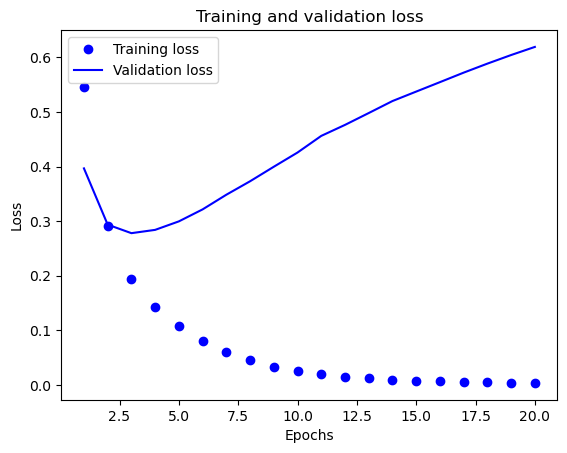

In [16]:
#Plotting training vs validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

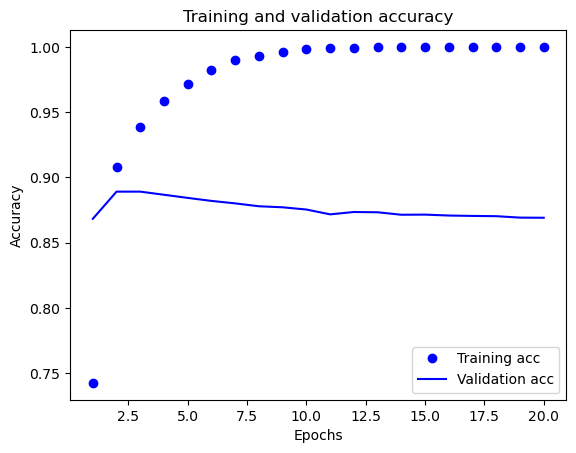

In [17]:
#plotting training vs accuracy
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [18]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.4402 - accuracy: 0.8217
Epoch 2/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2481 - accuracy: 0.9116
Epoch 3/4
49/49 [==============================] - 0s 5ms/step - loss: 0.1941 - accuracy: 0.9308
Epoch 4/4
782/782 [==============================] - 0s 573us/step - loss: 0.3137 - accuracy: 0.8765


In [19]:
results

[0.31366515159606934, 0.8765199780464172]

In [20]:
#Using a trained model to generate predictions on new data
model.predict(x_test)

782/782 [==============================] - 0s 471us/step


array([[0.13298187],
       [0.9994818 ],
       [0.8157732 ],
       ...,
       [0.10000945],
       [0.04508273],
       [0.6134037 ]], dtype=float32)

Epoch 1/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1668 - binary_accuracy: 0.7954 - val_loss: 0.1214 - val_binary_accuracy: 0.8557
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0922 - binary_accuracy: 0.9020 - val_loss: 0.0984 - val_binary_accuracy: 0.8808
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0690 - binary_accuracy: 0.9319 - val_loss: 0.0901 - val_binary_accuracy: 0.8864
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0554 - binary_accuracy: 0.9469 - val_loss: 0.0869 - val_binary_accuracy: 0.8891
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0462 - binary_accuracy: 0.9577 - val_loss: 0.0861 - val_binary_accuracy: 0.8856
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0391 - binary_accuracy: 0.9673 - val_loss: 0.0852 - val_binary_accuracy: 0.8849
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - los

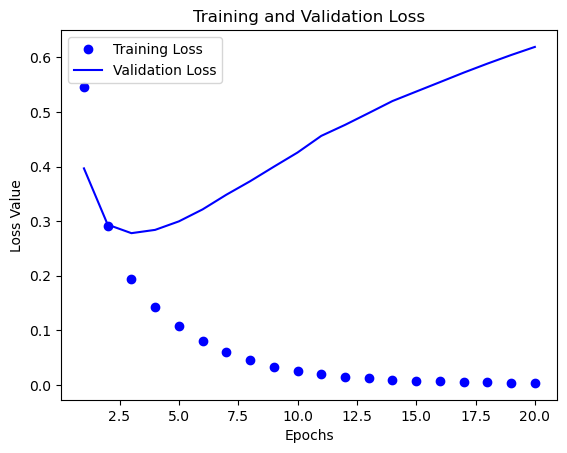

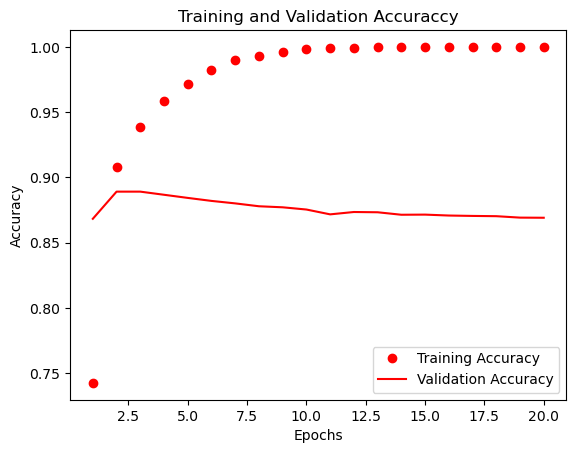

In [21]:
#implemented one hideden layer with 16 neurons and binary crossentropy loss function 

from keras import models
from tensorflow.keras import layers

model1 = models.Sequential()
model1.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model1.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])



x_value = x_train[:10000]
partial_x_train = x_train[10000:]

y_value = y_train[:10000]
partial_y_train = y_train[10000:]

history1 = model1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_value, y_value))

history_dict1 = history.history
history_dict1.keys()

# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_val1 = history_dict['loss']
val_loss_val1 = history_dict['val_loss']

epochs1 = range(1, len(loss_val1) + 1)

plt.plot(epochs1, loss_val1, 'bo', label="Training Loss")
plt.plot(epochs1, val_loss_val1, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc1_val = history_dict1['accuracy']
val_acc1_val1 = history_dict1['val_accuracy']

epochs1 = range(1, len(loss_values) + 1)

plt.plot(epochs1, acc1_val, 'ro', label="Training Accuracy")
plt.plot(epochs1, val_acc1_val1, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [22]:
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model1.add(layers.Dense(1, activation='sigmoid'))

model1.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

model1.fit(x_train, y_train, epochs=4, batch_size=512)
results_1 = model1.evaluate(x_test, y_test)

results_1

Epoch 1/4
49/49 [==============================] - 0s 5ms/step - loss: 0.1561 - accuracy: 0.8165
Epoch 2/4
49/49 [==============================] - 0s 5ms/step - loss: 0.0863 - accuracy: 0.9061
Epoch 3/4
49/49 [==============================] - 0s 5ms/step - loss: 0.0660 - accuracy: 0.9272
Epoch 4/4
782/782 [==============================] - 0s 470us/step - loss: 0.0864 - accuracy: 0.8866


[0.08638602495193481, 0.8866400122642517]

Epoch 1/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1508 - binary_accuracy: 0.8094 - val_loss: 0.1051 - val_binary_accuracy: 0.8734
Epoch 2/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0748 - binary_accuracy: 0.9189 - val_loss: 0.0888 - val_binary_accuracy: 0.8901
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0545 - binary_accuracy: 0.9456 - val_loss: 0.0849 - val_binary_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0424 - binary_accuracy: 0.9616 - val_loss: 0.0863 - val_binary_accuracy: 0.8843
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0345 - binary_accuracy: 0.9719 - val_loss: 0.0849 - val_binary_accuracy: 0.8846
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0276 - binary_accuracy: 0.9796 - val_loss: 0.0862 - val_binary_accuracy: 0.8824
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0

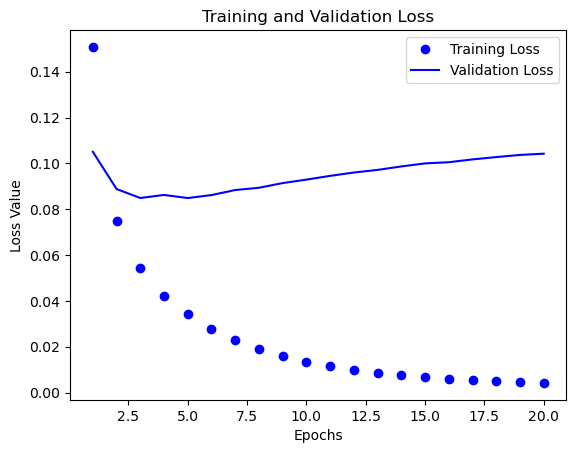

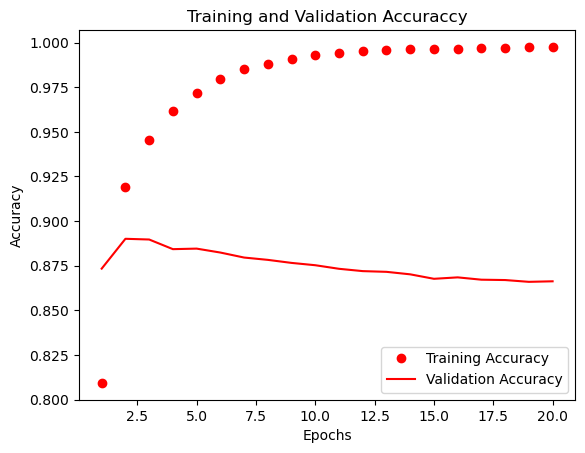

In [23]:
#implemented one hideden layer with 32 neurons and mse loss function 

from keras import models
from tensorflow.keras import layers

m_32 = models.Sequential()
m_32.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
m_32.add(layers.Dense(1, activation='sigmoid'))

m_32.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

m_32.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_32val = x_train[:10000]
partial_x_train = x_train[10000:]

y_32val = y_train[:10000]
partial_y_train = y_train[10000:]

h_32 = m_32.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict_32 = h_32.history
history_dict_32.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_val_32 = history_dict_32['loss']
val_loss32 = history_dict_32['val_loss']

epochs32 = range(1, len(loss_values) + 1)

plt.plot(epochs32, loss_val_32, 'bo', label="Training Loss")
plt.plot(epochs32, val_loss32, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc32 = history_dict_32['binary_accuracy']
val_acc32 = history_dict_32['val_binary_accuracy']

epochs32 = range(1, len(loss_values) + 1)

plt.plot(epochs32, acc32, 'ro', label="Training Accuracy")
plt.plot(epochs32, val_acc32, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [24]:
m32 = models.Sequential()
m32.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
m32.add(layers.Dense(1, activation='sigmoid'))

m32.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

m32.fit(x_train, y_train, epochs=4, batch_size=512)
results32 = m32.evaluate(x_test, y_test)

results32

Epoch 1/4
49/49 [==============================] - 1s 8ms/step - loss: 0.1312 - accuracy: 0.8369
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.0681 - accuracy: 0.9215
Epoch 3/4
49/49 [==============================] - 0s 6ms/step - loss: 0.0520 - accuracy: 0.9428
Epoch 4/4
782/782 [==============================] - 0s 529us/step - loss: 0.0885 - accuracy: 0.8801


[0.08847098797559738, 0.880079984664917]

Epoch 1/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1397 - binary_accuracy: 0.8222 - val_loss: 0.0982 - val_binary_accuracy: 0.8745
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0660 - binary_accuracy: 0.9251 - val_loss: 0.0860 - val_binary_accuracy: 0.8865
Epoch 3/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0468 - binary_accuracy: 0.9511 - val_loss: 0.0840 - val_binary_accuracy: 0.8854
Epoch 4/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0352 - binary_accuracy: 0.9655 - val_loss: 0.0850 - val_binary_accuracy: 0.8817
Epoch 5/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0265 - binary_accuracy: 0.9789 - val_loss: 0.0871 - val_binary_accuracy: 0.8822
Epoch 6/20
30/30 [==============================] - 0s 12ms/step - loss: 0.0204 - binary_accuracy: 0.9855 - val_loss: 0.0893 - val_binary_accuracy: 0.8782
Epoch 7/20
30/30 [==============================] - 0s 12ms/step - los

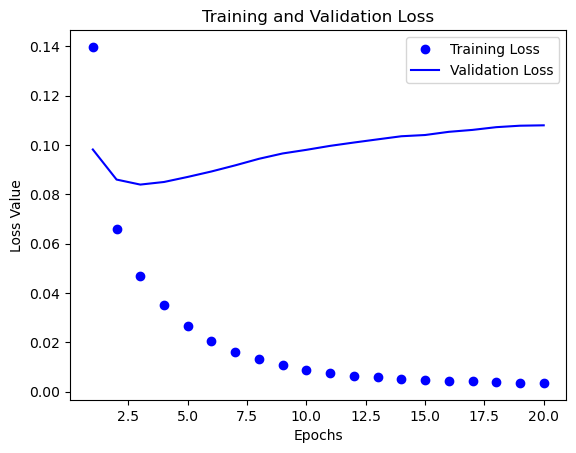

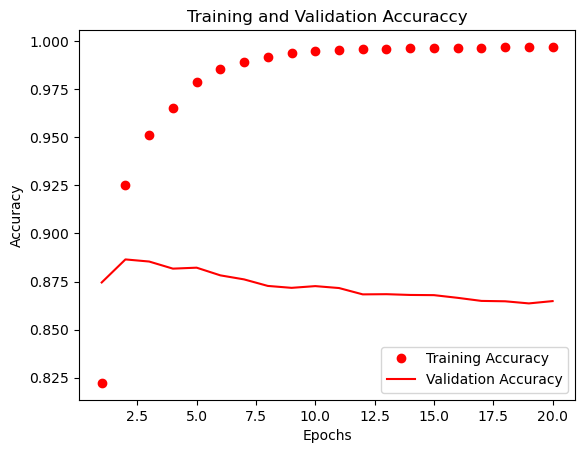

In [25]:
#implemented one hideden layer with 64 neurons and mse loss function 

from keras import models
from tensorflow.keras import layers

mo_64 = models.Sequential()
mo_64.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
mo_64.add(layers.Dense(1, activation='sigmoid'))

mo_64.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

mo_64.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_64 = x_train[:10000]
partial_x_train = x_train[10000:]

y_64 = y_train[:10000]
partial_y_train = y_train[10000:]

history64 = mo_64.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_64, y_64))

history_dict64 = history64.history
history_dict64.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_val64 = history_dict64['loss']
val_loss_val64 = history_dict64['val_loss']

epochs64 = range(1, len(loss_values) + 1)

plt.plot(epochs64, loss_val64, 'bo', label="Training Loss")
plt.plot(epochs64, val_loss_val64, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_64 = history_dict64['binary_accuracy']
val_acc_val64 = history_dict64['val_binary_accuracy']

epochs64 = range(1, len(loss_val64) + 1)

plt.plot(epochs64, acc_64, 'ro', label="Training Accuracy")
plt.plot(epochs64, val_acc_val64, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [26]:
mo_64 = models.Sequential()
mo_64.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
mo_64.add(layers.Dense(1, activation='sigmoid'))

mo_64.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
mo_64.fit(x_train, y_train, epochs=2, batch_size=512)
results_64 = mo_64.evaluate(x_test, y_test)

results_64

Epoch 1/2
49/49 [==============================] - 1s 8ms/step - loss: 0.1180 - accuracy: 0.8472
Epoch 2/2
782/782 [==============================] - 1s 860us/step - loss: 0.0859 - accuracy: 0.8850


[0.08590622246265411, 0.8850399851799011]

Epoch 1/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1394 - binary_accuracy: 0.8072 - val_loss: 0.0911 - val_binary_accuracy: 0.8834
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0593 - binary_accuracy: 0.9327 - val_loss: 0.0822 - val_binary_accuracy: 0.8903
Epoch 3/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0401 - binary_accuracy: 0.9586 - val_loss: 0.0840 - val_binary_accuracy: 0.8857
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0288 - binary_accuracy: 0.9744 - val_loss: 0.0866 - val_binary_accuracy: 0.8825
Epoch 5/20
30/30 [==============================] - 1s 19ms/step - loss: 0.0207 - binary_accuracy: 0.9843 - val_loss: 0.0893 - val_binary_accuracy: 0.8789
Epoch 6/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0150 - binary_accuracy: 0.9903 - val_loss: 0.0927 - val_binary_accuracy: 0.8771
Epoch 7/20
30/30 [==============================] - 0s 17ms/step - los

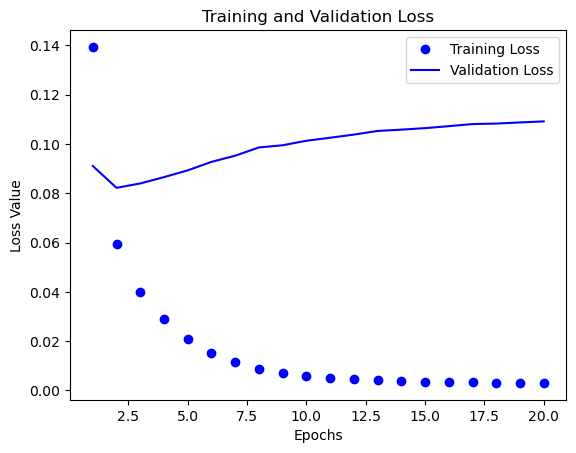

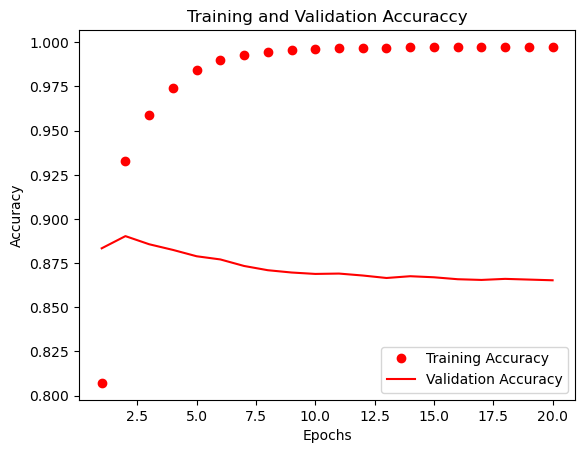

In [27]:
#implemented one hideden layer with 128 neurons and mse loss function 


from keras import models
from tensorflow.keras import layers

model_128 = models.Sequential()
model_128.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model_128.add(layers.Dense(1, activation='sigmoid'))

model_128.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model_128.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val128 = x_train[:10000]
partial_x_train = x_train[10000:]

y_val128 = y_train[:10000]
partial_y_train = y_train[10000:]

history128 = model_128.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val128, y_val128))

history_dict128 = history128.history
history_dict128.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_128 = history_dict128['loss']
val_loss_128 = history_dict128['val_loss']

epochs128 = range(1, len(loss_128) + 1)

plt.plot(epochs128, loss_128, 'bo', label="Training Loss")
plt.plot(epochs128, val_loss_128, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_values128 = history_dict128['binary_accuracy']
val_acc_values128 = history_dict128['val_binary_accuracy']

epochs = range(1, len(loss_128) + 1)

plt.plot(epochs128, acc_values128, 'ro', label="Training Accuracy")
plt.plot(epochs128, val_acc_values128, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [28]:
model_128 = models.Sequential()
model_128.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model_128.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model_128.add(layers.Dense(1, activation='sigmoid'))

model_128.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model_128.fit(x_train, y_train, epochs=3, batch_size=512)
result_128 = model.evaluate(x_test, y_test)

result_128

Epoch 1/3
49/49 [==============================] - 1s 12ms/step - loss: 0.1115 - accuracy: 0.8458
Epoch 2/3
49/49 [==============================] - 1s 11ms/step - loss: 0.0511 - accuracy: 0.9355
Epoch 3/3
782/782 [==============================] - 0s 435us/step - loss: 0.3137 - accuracy: 0.8765


[0.31366515159606934, 0.8765199780464172]

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1637 - accuracy: 0.7959 - val_loss: 0.1036 - val_accuracy: 0.8680
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.0696 - accuracy: 0.9126 - val_loss: 0.0827 - val_accuracy: 0.8906
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 0.0428 - accuracy: 0.9504 - val_loss: 0.0837 - val_accuracy: 0.8861
Epoch 4/20
30/30 [==============================] - 0s 7ms/step - loss: 0.0280 - accuracy: 0.9700 - val_loss: 0.0891 - val_accuracy: 0.8779
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0189 - accuracy: 0.9829 - val_loss: 0.0943 - val_accuracy: 0.8759
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0134 - accuracy: 0.9889 - val_loss: 0.0977 - val_accuracy: 0.8740
Epoch 7/20
30/30 [==============================] - 0s 7ms/step - loss: 0.0100 - accuracy: 0.9912 - val_loss: 0.1008 - val_accuracy: 0.8731
Epoch 8/20
30/30 [=

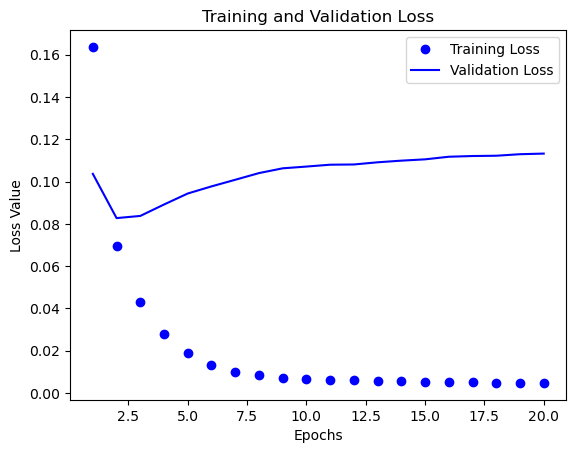

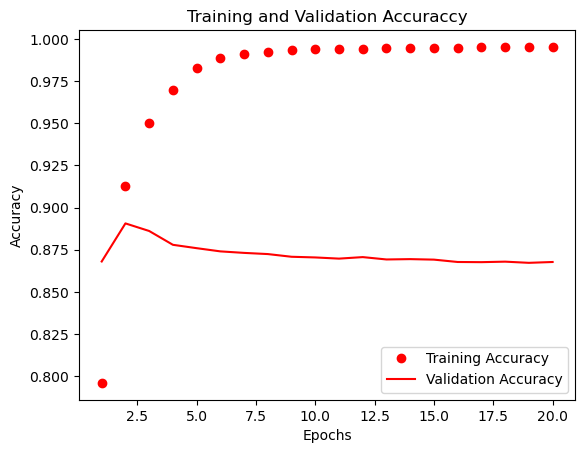

In [29]:
#implemented three hideden layer with 16 neurons and mse loss function 


from keras import models
from tensorflow.keras import layers

model3 = models.Sequential()
model3.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model3.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model3.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val3 = x_train[:10000]
partial_x_train = x_train[10000:]

y_val3 = y_train[:10000]
partial_y_train = y_train[10000:]

history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val3, y_val3))

history_dict3 = history3.history
history_dict3.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_val3 = history_dict3['loss']
val_loss_val3 = history_dict3['val_loss']

epochs3 = range(1, len(loss_val3) + 1)

plt.plot(epochs3, loss_val3, 'bo', label="Training Loss")
plt.plot(epochs3, val_loss_val3, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_3 = history_dict3['accuracy']
val_acc_3 = history_dict3['val_accuracy']

epochs3 = range(1, len(loss_val3) + 1)

plt.plot(epochs3, acc_3, 'ro', label="Training Accuracy")
plt.plot(epochs3, val_acc_3, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [30]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model3.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model3.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model3.fit(x_train, y_train, epochs=3, batch_size=512)
results3 = model3.evaluate(x_test, y_test)

results3

Epoch 1/3
49/49 [==============================] - 0s 5ms/step - loss: 0.1396 - accuracy: 0.8272
Epoch 2/3
49/49 [==============================] - 0s 4ms/step - loss: 0.0620 - accuracy: 0.9217
Epoch 3/3
782/782 [==============================] - 0s 436us/step - loss: 0.0913 - accuracy: 0.8778


[0.09132971614599228, 0.8777599930763245]

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0352 - binary_accuracy: 0.9574 - val_loss: 0.0379 - val_binary_accuracy: 0.9523
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.0219 - binary_accuracy: 0.9775 - val_loss: 0.0433 - val_binary_accuracy: 0.9421
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 0.0155 - binary_accuracy: 0.9871 - val_loss: 0.0479 - val_binary_accuracy: 0.9373
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0110 - binary_accuracy: 0.9921 - val_loss: 0.0519 - val_binary_accuracy: 0.9313
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0080 - binary_accuracy: 0.9949 - val_loss: 0.0559 - val_binary_accuracy: 0.9268
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0059 - binary_accuracy: 0.9962 - val_loss: 0.0586 - val_binary_accuracy: 0.9228
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0

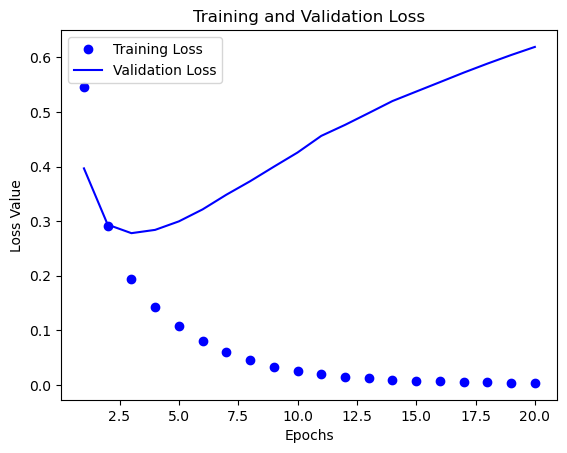

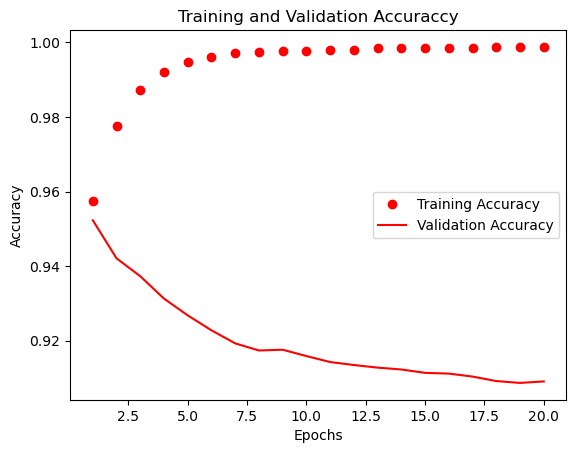

In [31]:
#implemented three hideden layer with 16 neurons and mse loss function 


from keras import models
from tensorflow.keras import layers

model31 = models.Sequential()
model31.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model31.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model31.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model31.add(layers.Dense(1, activation='sigmoid'))

model31.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model31.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val31 = x_train[:10000]
partial_x_train = x_train[10000:]

y_val31 = y_train[:10000]
partial_y_train = y_train[10000:]

history31 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val31, y_val31))

history_dict31 = history31.history
history_dict31.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_val31 = history_dict['loss']
val_loss_val31 = history_dict['val_loss']

epochs31 = range(1, len(loss_val31) + 1)

plt.plot(epochs31, loss_val31, 'bo', label="Training Loss")
plt.plot(epochs31, val_loss_val31, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_val31 = history_dict31['binary_accuracy']
val_acc_val31 = history_dict31['val_binary_accuracy']

epochs31 = range(1, len(loss_val31) + 1)

plt.plot(epochs31, acc_val31, 'ro', label="Training Accuracy")
plt.plot(epochs31, val_acc_val31, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [32]:
model31 = models.Sequential()
model31.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
layers.Dropout(0.5),
model31.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
layers.Dropout(0.5),
model31.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
layers.Dropout(0.5),
model31.add(layers.Dense(1, activation='sigmoid'))

model31.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model31.fit(x_train, y_train, epochs=3, batch_size=512)
result = model31.evaluate(x_test, y_test)

result

Epoch 1/3
49/49 [==============================] - 0s 5ms/step - loss: 0.1355 - accuracy: 0.8302
Epoch 2/3
49/49 [==============================] - 0s 4ms/step - loss: 0.0614 - accuracy: 0.9230
Epoch 3/3
782/782 [==============================] - 0s 453us/step - loss: 0.0933 - accuracy: 0.8757


[0.09334062784910202, 0.8757200241088867]

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0013 - binary_accuracy: 0.9988 - val_loss: 0.0730 - val_binary_accuracy: 0.9082
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 0.0012 - binary_accuracy: 0.9989 - val_loss: 0.0733 - val_binary_accuracy: 0.9083
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 0.0012 - binary_accuracy: 0.9989 - val_loss: 0.0736 - val_binary_accuracy: 0.9083
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0012 - binary_accuracy: 0.9989 - val_loss: 0.0739 - val_binary_accuracy: 0.9080
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0012 - binary_accuracy: 0.9989 - val_loss: 0.0742 - val_binary_accuracy: 0.9074
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0012 - binary_accuracy: 0.9989 - val_loss: 0.0744 - val_binary_accuracy: 0.9077
Epoch 7/20
30/30 [==============================] - 0s 7ms/step - loss: 0.0

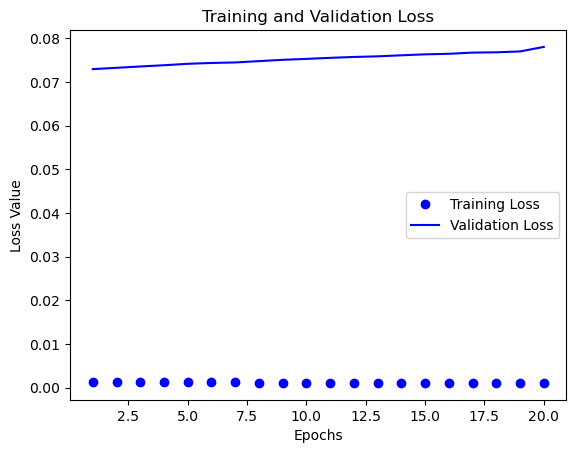

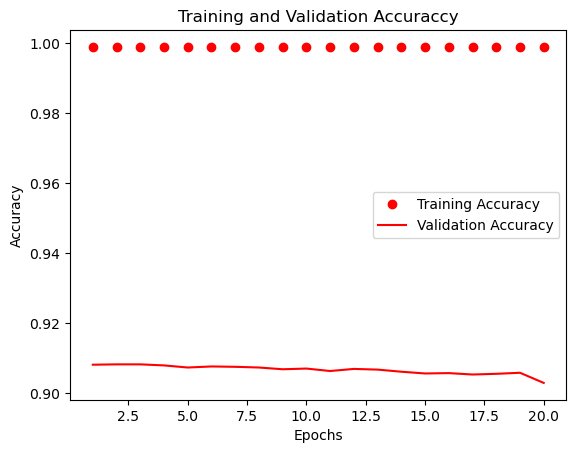

In [33]:
#implemented three hidden layer with 32 neurons and mse loss function 


from keras import models
from tensorflow.keras import layers

model332 = models.Sequential()
model332.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model332.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model332.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model332.add(layers.Dense(1, activation='sigmoid'))

model332.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model332.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val332 = x_train[:10000]
partial_x_train = x_train[10000:]

y_val332 = y_train[:10000]
partial_y_train = y_train[10000:]

history332 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val332, y_val332))

history_dict332 = history332.history
history_dict332.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_val332 = history_dict332['loss']
val_loss_val332 = history_dict332['val_loss']

epochs332 = range(1, len(loss_val332) + 1)

plt.plot(epochs332, loss_val332, 'bo', label="Training Loss")
plt.plot(epochs332, val_loss_val332, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_val332 = history_dict332['binary_accuracy']
val_acc_val332 = history_dict332['val_binary_accuracy']

epochs332 = range(1, len(loss_values) + 1)

plt.plot(epochs332, acc_val332, 'ro', label="Training Accuracy")
plt.plot(epochs332, val_acc_val332, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [34]:
model332 = models.Sequential()
model332.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model332.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model332.add(layers.Dense(32, activation='tanh', input_shape=(10000,)))
model332.add(layers.Dense(1, activation='sigmoid'))

model332.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model332.fit(x_train, y_train, epochs=2, batch_size=512)
results332 = model.evaluate(x_test, y_test)

results332

Epoch 1/2
49/49 [==============================] - 0s 6ms/step - loss: 0.1175 - accuracy: 0.8405
Epoch 2/2
782/782 [==============================] - 0s 430us/step - loss: 0.1224 - binary_accuracy: 0.8564


[0.12235388904809952, 0.8563600182533264]

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0010 - binary_accuracy: 0.9990 - val_loss: 0.0780 - val_binary_accuracy: 0.9046
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0010 - binary_accuracy: 0.9990 - val_loss: 0.0781 - val_binary_accuracy: 0.9043
Epoch 3/20
30/30 [==============================] - 0s 7ms/step - loss: 0.0010 - binary_accuracy: 0.9990 - val_loss: 0.0782 - val_binary_accuracy: 0.9040
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0010 - binary_accuracy: 0.9990 - val_loss: 0.0783 - val_binary_accuracy: 0.9042
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0010 - binary_accuracy: 0.9990 - val_loss: 0.0784 - val_binary_accuracy: 0.9036
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0010 - binary_accuracy: 0.9990 - val_loss: 0.0785 - val_binary_accuracy: 0.9036
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.0

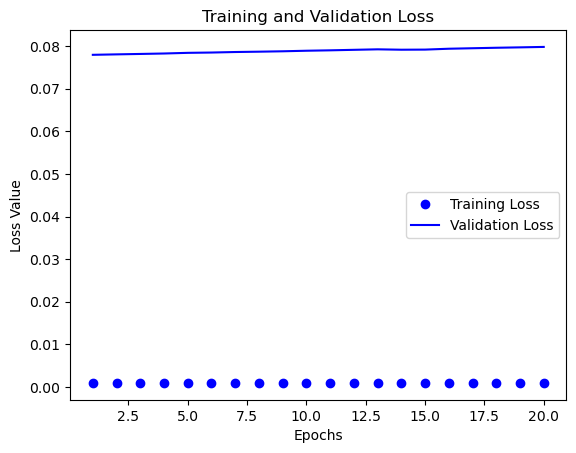

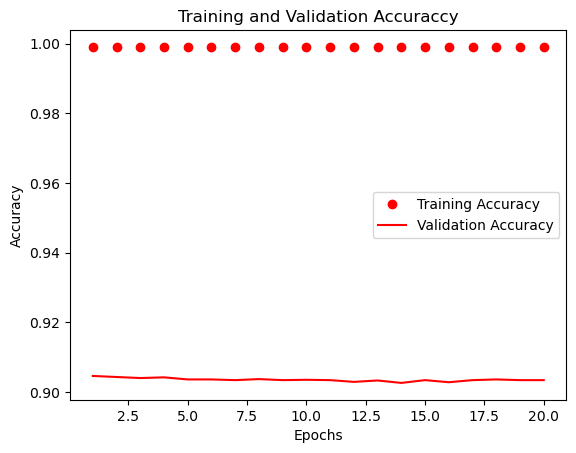

In [35]:
#implemented three hideden layer with 64 neurons and mse loss function 


from keras import models
from tensorflow.keras import layers

model364 = models.Sequential()
model364.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model364.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model364.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model364.add(layers.Dense(1, activation='sigmoid'))

model364.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model364.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_364 = x_train[:10000]
partial_x_train = x_train[10000:]

y_364 = y_train[:10000]
partial_y_train = y_train[10000:]

hist364 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_364, y_364))

history_dict364 = hist364.history
history_dict364.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_364 = history_dict364['loss']
val_loss_364 = history_dict364['val_loss']

epochs364 = range(1, len(loss_values) + 1)

plt.plot(epochs364, loss_364, 'bo', label="Training Loss")
plt.plot(epochs364, val_loss_364, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_364 = history_dict364['binary_accuracy']
val_acc_364 = history_dict364['val_binary_accuracy']

epochs364 = range(1, len(loss_values) + 1)

plt.plot(epochs364, acc_364, 'ro', label="Training Accuracy")
plt.plot(epochs364, val_acc_364, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [36]:
model364 = models.Sequential()
model364.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model364.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model364.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model364.add(layers.Dense(1, activation='sigmoid'))

model364.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model364.fit(x_train, y_train, epochs=2, batch_size=512)
result_364 = model.evaluate(x_test, y_test)

result_364

Epoch 1/2
49/49 [==============================] - 1s 9ms/step - loss: 0.1132 - accuracy: 0.8473
Epoch 2/2
782/782 [==============================] - 0s 435us/step - loss: 0.1231 - binary_accuracy: 0.8567


[0.12308883666992188, 0.8566799759864807]

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 9.4383e-04 - binary_accuracy: 0.9991 - val_loss: 0.0799 - val_binary_accuracy: 0.9030
Epoch 2/20
30/30 [==============================] - 0s 8ms/step - loss: 9.4338e-04 - binary_accuracy: 0.9991 - val_loss: 0.0800 - val_binary_accuracy: 0.9034
Epoch 3/20
30/30 [==============================] - 0s 6ms/step - loss: 9.4299e-04 - binary_accuracy: 0.9991 - val_loss: 0.0801 - val_binary_accuracy: 0.9033
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 9.4259e-04 - binary_accuracy: 0.9991 - val_loss: 0.0802 - val_binary_accuracy: 0.9034
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 9.4224e-04 - binary_accuracy: 0.9991 - val_loss: 0.0803 - val_binary_accuracy: 0.9035
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 9.4190e-04 - binary_accuracy: 0.9991 - val_loss: 0.0804 - val_binary_accuracy: 0.9029
Epoch 7/20
30/30 [==============================] -

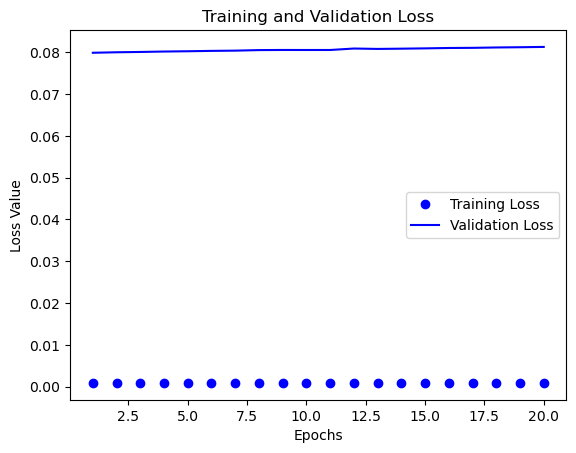

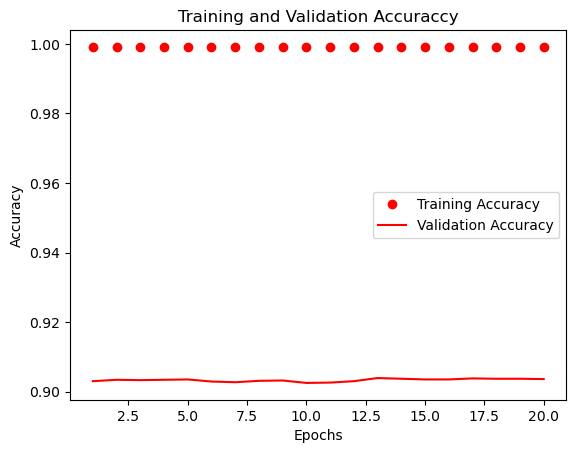

In [37]:
#implemented three hideden layer with 128 neurons and mse loss function 


from keras import models
from tensorflow.keras import layers

model328 = models.Sequential()
model328.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model328.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model328.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model328.add(layers.Dense(1, activation='sigmoid'))

model328.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

from keras import optimizers
from keras import losses
from keras import metrics

from tensorflow import keras
from keras import optimizers
from tensorflow.keras import optimizers
from tensorflow.keras import optimizers

model328.compile(optimizer='adam',
              loss = losses.mse,
              metrics = [metrics.binary_accuracy])

x_val_328 = x_train[:10000]
partial_x_train = x_train[10000:]

y_val_328 = y_train[:10000]
partial_y_train = y_train[10000:]

hist_328 = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val_328, y_val_328))

history_dict328 = hist_328.history
history_dict328.keys()
# Plotting the training and validation loss

import matplotlib.pyplot as plt
%matplotlib inline

loss_val328 = history_dict328['loss']
val_loss_val328 = history_dict328['val_loss']

epochs328 = range(1, len(loss_val328) + 1)

plt.plot(epochs328, loss_val328, 'bo', label="Training Loss")
plt.plot(epochs328, val_loss_val328, 'b', label="Validation Loss")

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss Value')
plt.legend()

plt.show()


# Plotting the training and validation accuracy
# Training and Validation Accuracy

acc_val328 = history_dict328['binary_accuracy']
val_acc_val328 = history_dict328['val_binary_accuracy']

epochs328 = range(1, len(loss_values) + 1)

plt.plot(epochs328, acc_val328, 'ro', label="Training Accuracy")
plt.plot(epochs328, val_acc_val328, 'r', label="Validation Accuracy")

plt.title('Training and Validation Accuraccy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [38]:
model328 = models.Sequential()
model328.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model328.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model328.add(layers.Dense(128, activation='tanh', input_shape=(10000,)))
model328.add(layers.Dense(1, activation='sigmoid'))

model328.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])
model328.fit(x_train, y_train, epochs=2, batch_size=512)
result_328= model.evaluate(x_test, y_test)

result_328

Epoch 1/2
49/49 [==============================] - 1s 14ms/step - loss: 0.1094 - accuracy: 0.8476
Epoch 2/2
782/782 [==============================] - 0s 430us/step - loss: 0.1243 - binary_accuracy: 0.8563


[0.12429197132587433, 0.8563200235366821]

In [39]:
#Training model with hyper tuned parameters

from tensorflow.keras import regularizers
Hypertune = keras.Sequential([
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),    
    layers.Dense(32, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu",kernel_regularizer=regularizers.l2(0.0001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
Hypertune.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

history_Hypertune = Hypertune.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dictHypertune = history_Hypertune.history
history_dictHypertune.keys()

Epoch 1/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2446 - accuracy: 0.5905 - val_loss: 0.2043 - val_accuracy: 0.7882
Epoch 2/20
30/30 [==============================] - 0s 12ms/step - loss: 0.1861 - accuracy: 0.7596 - val_loss: 0.1279 - val_accuracy: 0.8726
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.1379 - accuracy: 0.8449 - val_loss: 0.0991 - val_accuracy: 0.8844
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1071 - accuracy: 0.8868 - val_loss: 0.0949 - val_accuracy: 0.8826
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0874 - accuracy: 0.9117 - val_loss: 0.0985 - val_accuracy: 0.8861
Epoch 6/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0759 - accuracy: 0.9264 - val_loss: 0.0964 - val_accuracy: 0.8888
Epoch 7/20
30/30 [==============================] - 0s 11ms/step - loss: 0.0678 - accuracy: 0.9348 - val_loss: 0.0978 - val_accuracy: 0.8871
Epoch 8/20
30/3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

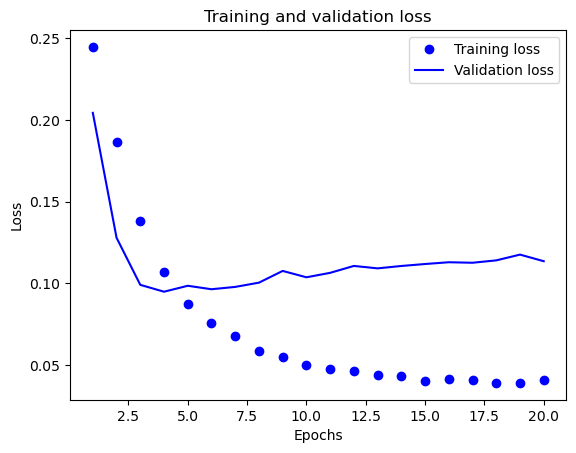

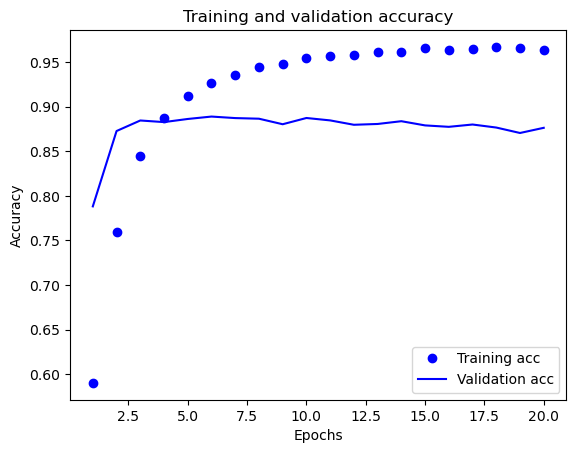

In [40]:
loss_h = history_dictHypertune["loss"]
val_lossh = history_dictHypertune["val_loss"]
epochsh = range(1, len(loss_h) + 1)
plt.plot(epochsh, loss_h, "bo", label="Training loss")
plt.plot(epochsh, val_lossh, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


plt.clf()
acch = history_dictHypertune["accuracy"]
val_acch = history_dictHypertune["val_accuracy"]
plt.plot(epochsh, acch, "bo", label="Training acc")
plt.plot(epochsh, val_acch, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [41]:
Hypertune.fit(x_train, y_train, epochs=8, batch_size=512)
results_Hypertune = Hypertune.evaluate(x_test, y_test)
results_Hypertune

Epoch 1/8
49/49 [==============================] - 0s 8ms/step - loss: 0.0723 - accuracy: 0.9254
Epoch 2/8
49/49 [==============================] - 0s 7ms/step - loss: 0.0660 - accuracy: 0.9312
Epoch 3/8
49/49 [==============================] - 0s 7ms/step - loss: 0.0618 - accuracy: 0.9375
Epoch 4/8
49/49 [==============================] - 0s 7ms/step - loss: 0.0593 - accuracy: 0.9412
Epoch 5/8
49/49 [==============================] - 0s 7ms/step - loss: 0.0569 - accuracy: 0.9444
Epoch 6/8
49/49 [==============================] - 0s 7ms/step - loss: 0.0545 - accuracy: 0.9474
Epoch 7/8
49/49 [==============================] - 0s 7ms/step - loss: 0.0548 - accuracy: 0.9456
Epoch 8/8
782/782 [==============================] - 0s 573us/step - loss: 0.1145 - accuracy: 0.8761


[0.11452482640743256, 0.8760799765586853]